In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/weatherAUS.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
#DATA VISUALIZATION AND CLEANING¶
#Steps involves in this section:

#Count plot of target column
#Correlation amongst numeric attributes
#Parse Dates into datetime
#Encoding days and months as continuous cyclic features

<Axes: xlabel='RainTomorrow', ylabel='count'>

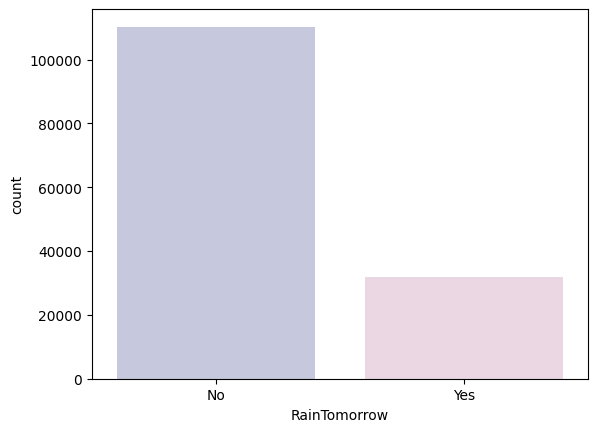

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols =['#C2C4E2', '#EED4E5']
sns.countplot(x= data['RainTomorrow'], palette=cols)

<ipython-input-84-eff4fa42f014>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_2019 = data.corr()


Text(0.5, 1.0, 'Correlation between different fearures')

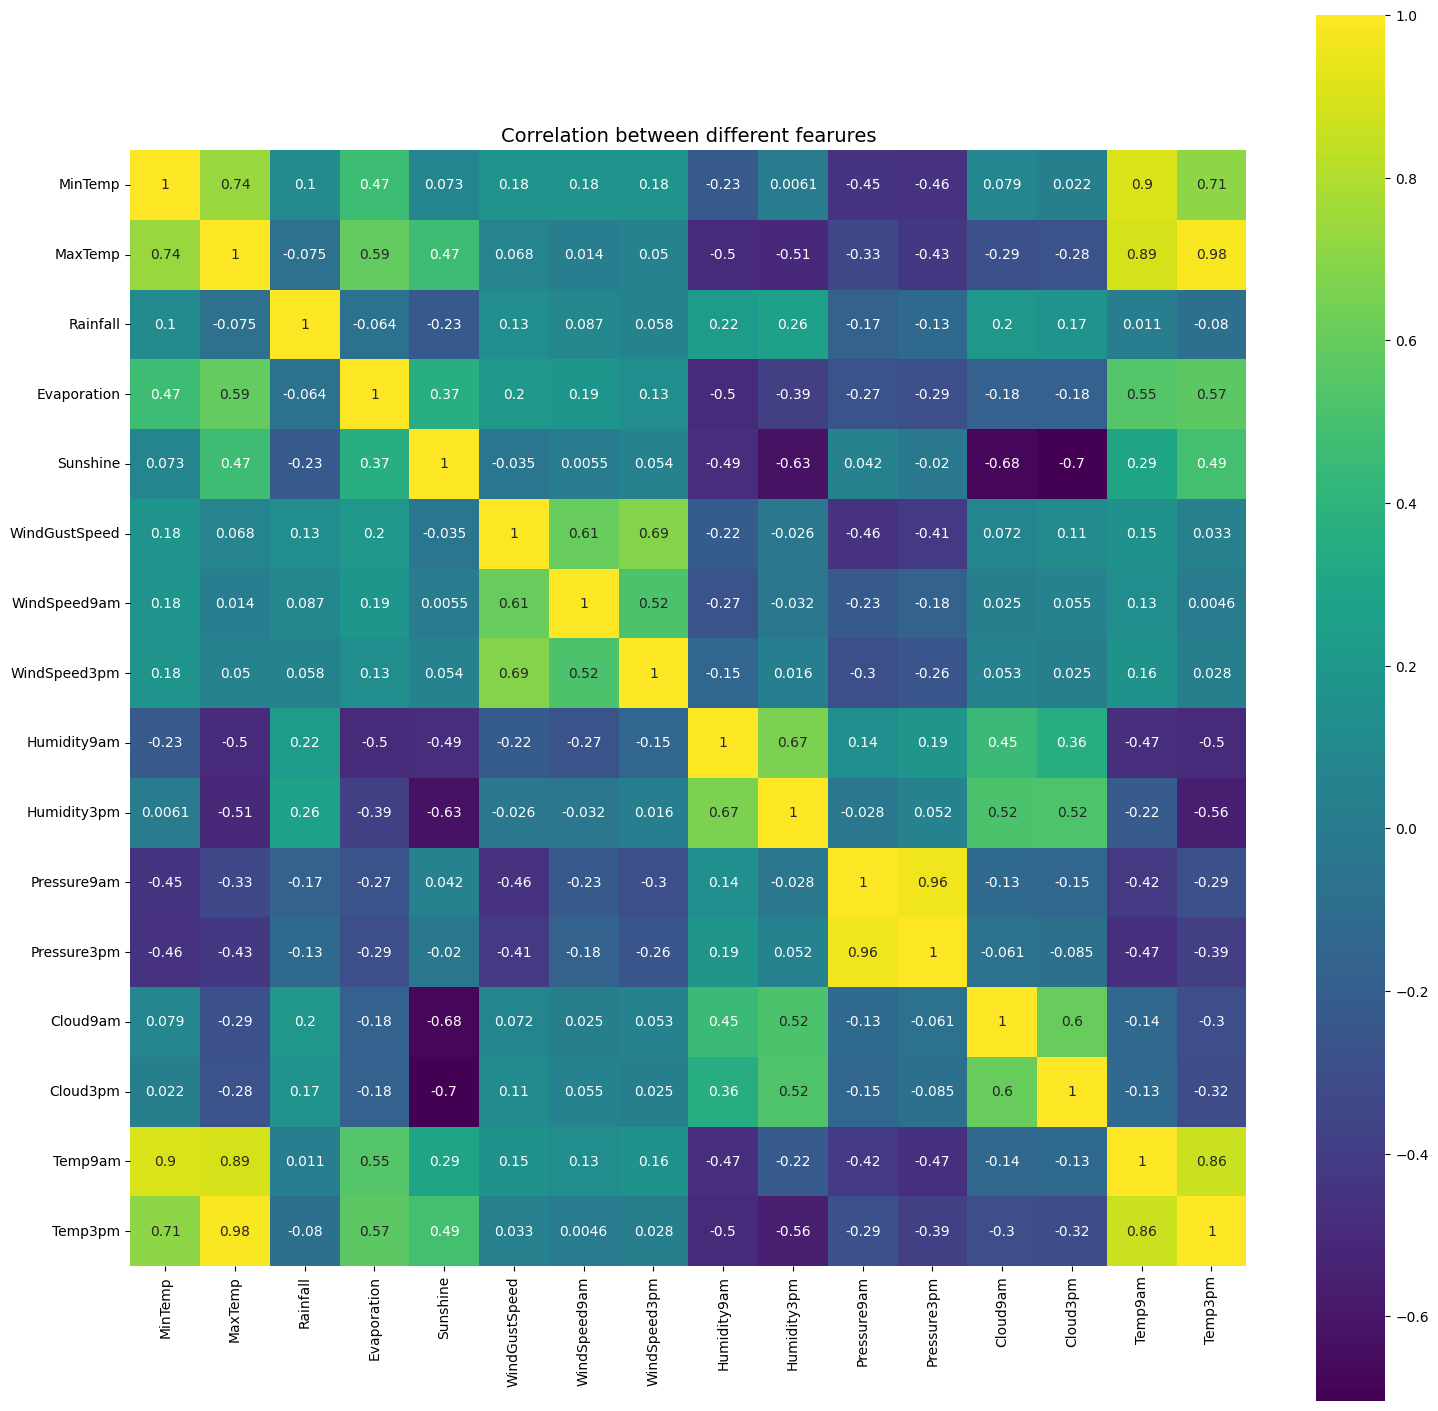

In [ ]:
correl_2019 = data.corr()
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(correl_2019, vmax =1, cmap ='viridis', square = True, annot=True, ax =ax)
ax.set_title("Correlation between different fearures", fontsize=14)

In [ ]:
correl_2019

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [ ]:
print(correl_2019['Rainfall'].sort_values(ascending = False), '\n')

Rainfall         1.000000
Humidity3pm      0.255755
Humidity9am      0.224405
Cloud9am         0.198528
Cloud3pm         0.172403
WindGustSpeed    0.133659
MinTemp          0.103938
WindSpeed9am     0.087338
WindSpeed3pm     0.057887
Temp9am          0.011192
Evaporation     -0.064351
MaxTemp         -0.074992
Temp3pm         -0.079657
Pressure3pm     -0.126534
Pressure9am     -0.168154
Sunshine        -0.227549
Name: Rainfall, dtype: float64 



In [ ]:
#Parsing datetime
#exploring the length of date objects
lenghts = data['Date'].str.len()
lenghts.value_counts()

10    145460
Name: Date, dtype: int64

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data['year']=data.Date.dt.year

In [ ]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


In [ ]:
# function to encode datetime into cyclic parameters.
def encode(data, col, max_val):
  data[col + '_sin'] = np.sin(2*np.pi * data[col]/max_val)
  data[col + '_cos'] = np.cos(2*np.pi * data[col]/max_val)
  return data

data['month']=data.Date.dt.month
data = encode(data, 'month',12)

data['day']=data.Date.dt.day
data = encode(data, 'day',31)

data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0, 0.5, 'Days in Year')

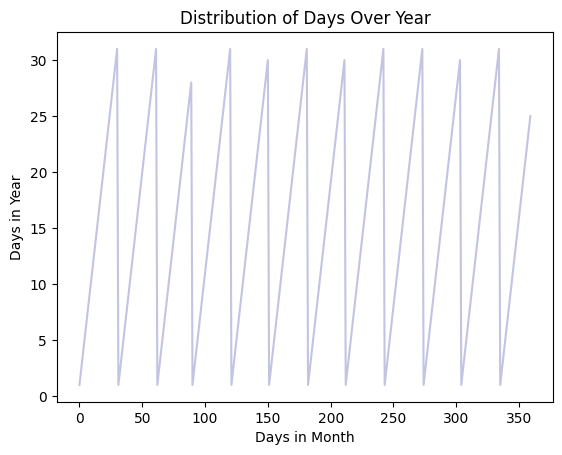

In [ ]:
# roughly a year's span section
section = data[:360]
tm=section["day"].plot(color ='#C2C4E2')
tm.set_title("Distribution of Days Over Year")
tm.set_xlabel("Days in Month")
tm.set_ylabel("Days in Year")

Text(0.5, 24.0, 'Sine Encoded Month')

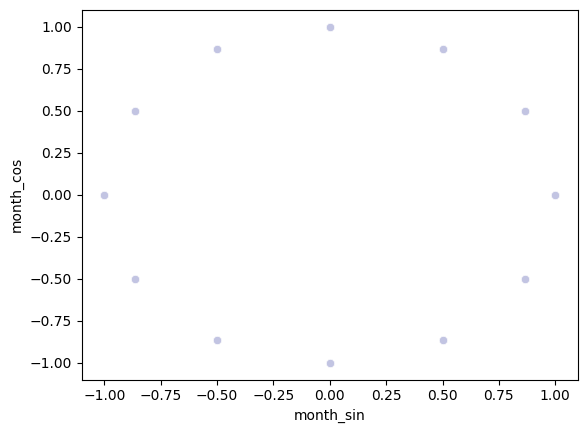

In [ ]:
cyclic_month = sns.scatterplot(x="month_sin", y = "month_cos", data=data,color ='#C2C4E2')
tm.set_title("Cyclic Encoding of the month")
tm.set_ylabel("Cosine Encoded Month")
tm.set_xlabel("Sine Encoded Month")

Text(0.5, 24.0, 'Sine Encoded Day')

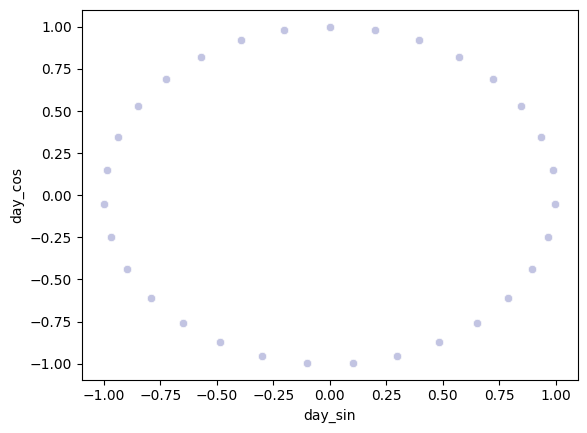

In [ ]:
cyclic_month = sns.scatterplot(x="day_sin", y = "day_cos", data=data,color ='#C2C4E2')
tm.set_title("Cyclic Encoding of the day")
tm.set_ylabel("Cosine Encoded Day")
tm.set_xlabel("Sine Encoded Day")

In [ ]:
col_list = list(data.columns)
print(col_list)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'month_sin', 'month_cos', 'day', 'day_sin', 'day_cos']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
s=(data.dtypes=='object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
for i in object_cols:
  print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [ ]:
for i in object_cols:
  data[i].fillna(data[i].mode()[0], inplace =True)

In [ ]:
t=(data.dtypes=='float64')
num_cols = list(t[t].index)

print("Numerical variables:")
print(num_cols)

Numerical variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [ ]:
for i in num_cols:
  print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [ ]:
for i in num_cols:
  data[i].fillna(data[i].median(), inplace =True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [ ]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
month_sin        0
month_cos        0
day              0
day_sin          0
day_cos          0
dtype: int64

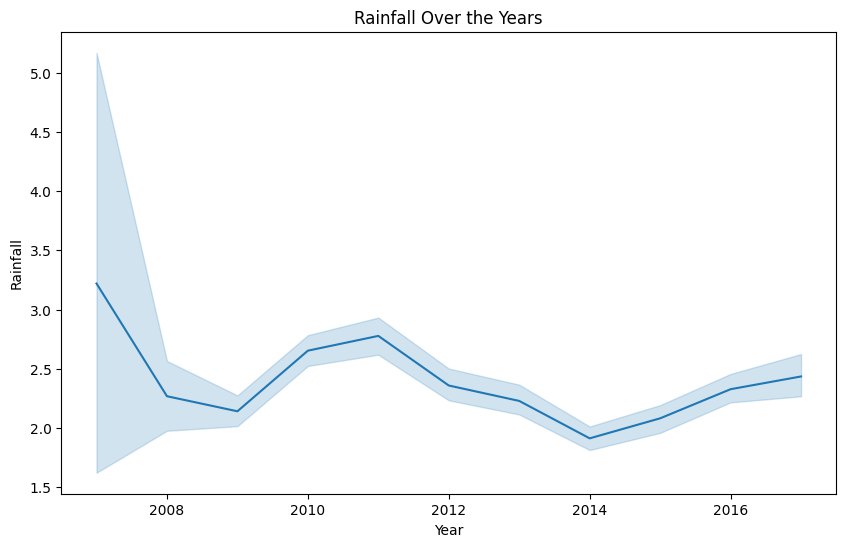

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.lineplot(x=data['year'], y=data['Rainfall'])

plt.title("Rainfall Over the Years")
plt.xlabel("Year")
plt.ylabel("Rainfall")

plt.grid(False)

plt.show()

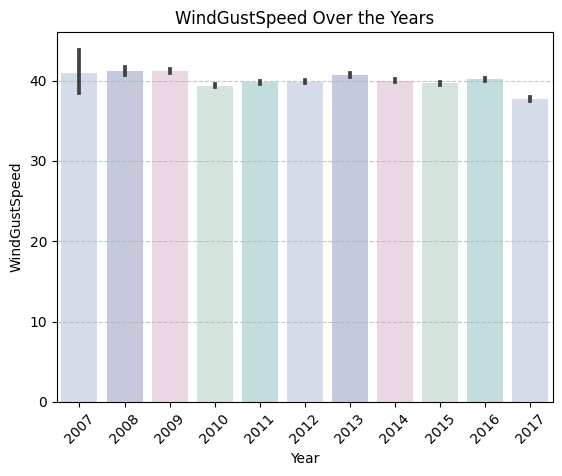

In [ ]:
plt.figure()  # Adjust the figure size if needed
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]

sns.barplot(x=data['year'], y=data['WindGustSpeed'], palette=colours)

plt.title("WindGustSpeed Over the Years")
plt.xlabel("Year")
plt.ylabel("WindGustSpeed")

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
#DATA PREPROCESSING¶

In [ ]:
#DATA PREPROCESSING¶
#Steps involved in Data Preprocessing:

#Label encoding columns with categorical data
#Perform the scaling of the features
#Detecting outliers
#Dropping the outliers based on data analysis#DATA PREPROCESSING¶
#Steps involved in Data Preprocessing:

#Label encoding columns with categorical data
#Perform the scaling of the features
#Detecting outliers
#Dropping the outliers based on data analysis

In [ ]:
#Label encoding columns with categorical data
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
label_encoder = LabelEncoder()
for i in object_cols:
  data[i]= label_encoder.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [ ]:
features = data.drop(['RainTomorrow','day', 'month','Date'], axis =1)
target = data['RainTomorrow']

In [ ]:
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns = col_names)
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


In [ ]:
#Detecting outliers
#looking at the scaled features

<function matplotlib.pyplot.show(close=None, block=None)>

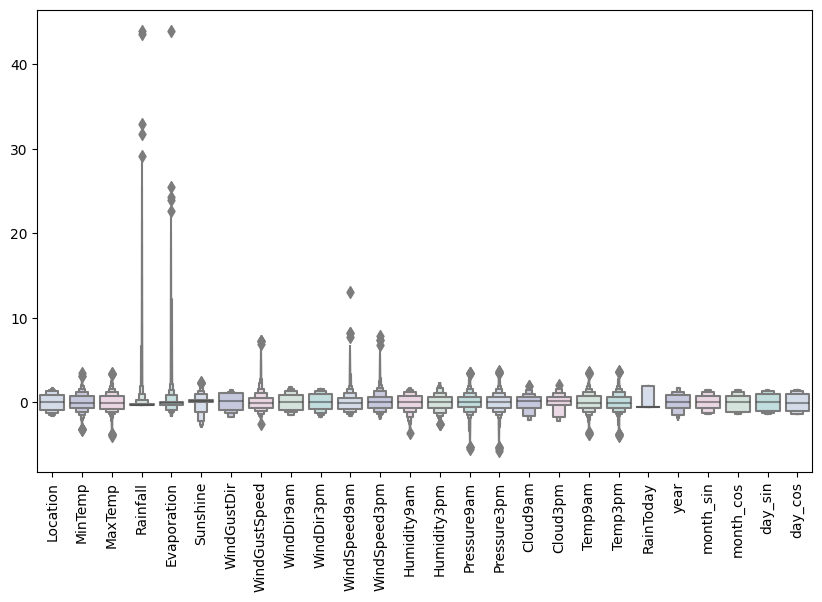

In [ ]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize = (10,6))
sns.boxenplot(data =features, palette = colours)
plt.xticks(rotation = 90)
plt.show

In [ ]:
features.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'month_sin', 'month_cos', 'day_sin',
       'day_cos'],
      dtype='object')

In [ ]:
features['RainTomorrow'] = target
features=features[(features["MinTemp"]<2.3) & (features["MinTemp"]> -2.3)]
features=features[(features["MaxTemp"]<2.3) & (features["MaxTemp"]> -2)]
features=features[(features["MaxTemp"]<4.5)]
features=features[(features["Evaporation"]<2.8)]
features=features[(features["Sunshine"]<2.1)]
features=features[(features["WindGustSpeed"]<4) & (features["WindGustSpeed"]> -4)]
features=features[(features["WindSpeed9am"]<4)]
features=features[(features["WindSpeed9am"]<2.5)]
features=features[(features["Humidity9am"]>-3)]
features=features[(features["Humidity3pm"]>-2.2)]
features=features[(features["Pressure9am"]<2) & (features["Pressure9am"]> -2.7)]
features=features[(features["Pressure3pm"]<2) & (features["Pressure3pm"]> -2.7)]
features=features[(features["Cloud9am"]<1.8)]
features=features[(features["Cloud3pm"]<2)]
features=features[(features["Temp9am"]<2.3) & (features["Temp9am"]> -2)]
features=features[(features["Temp3pm"]<2.3) & (features["Temp3pm"]> -2)]

features.shape

(128795, 27)

<function matplotlib.pyplot.show(close=None, block=None)>

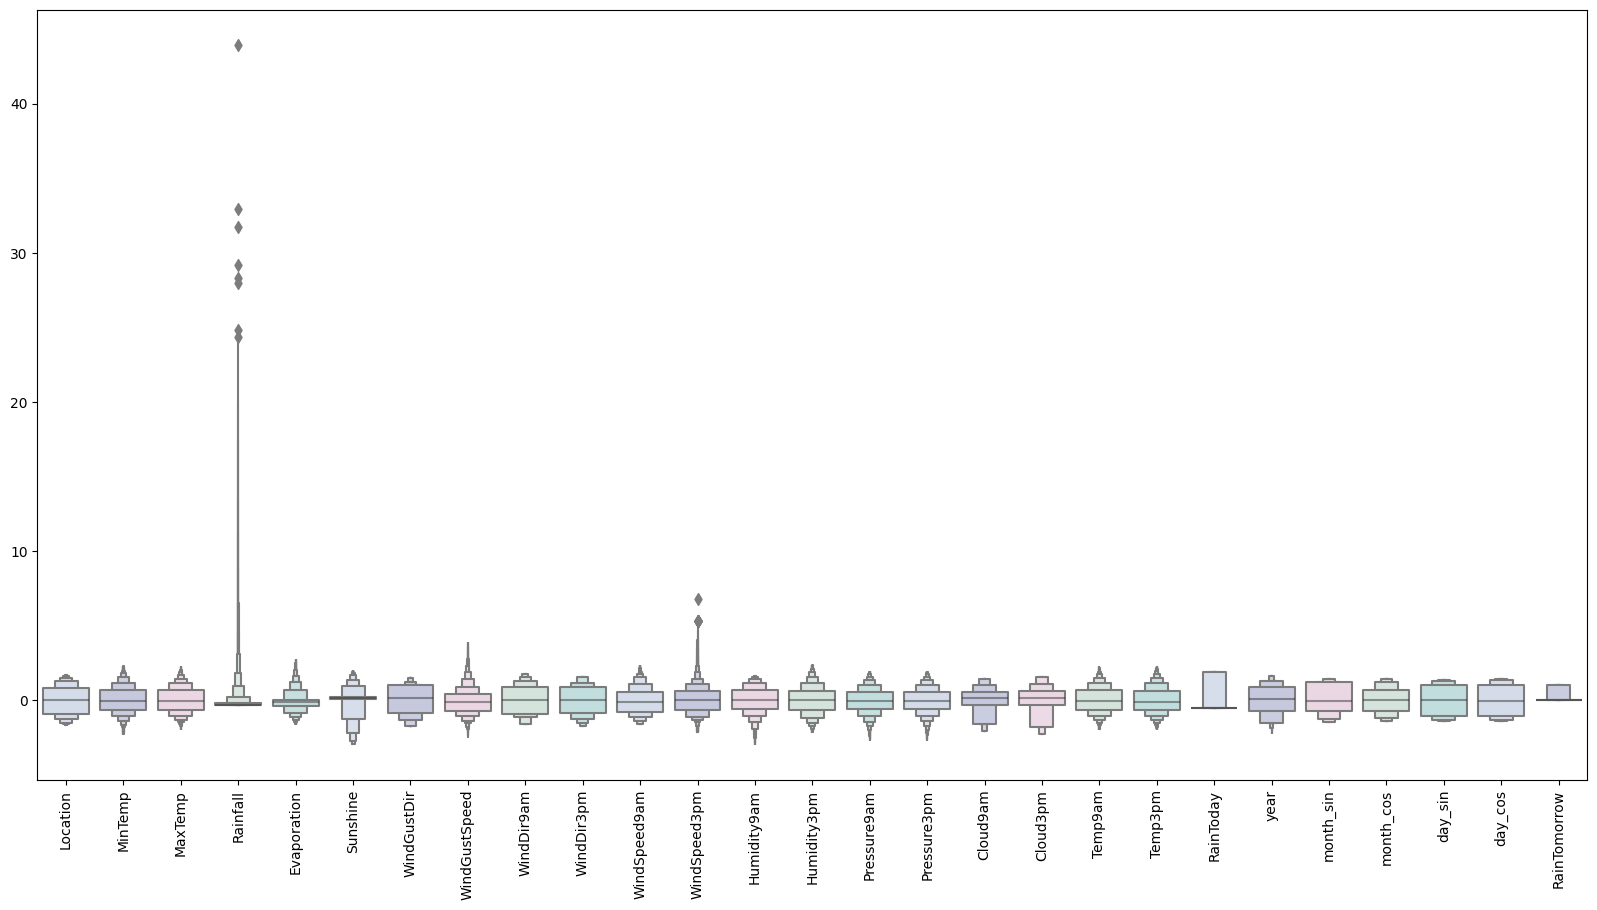

In [ ]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize = (20,10))
sns.boxenplot(data =features, palette = colours)
plt.xticks(rotation = 90)
plt.show

In [ ]:
#MODEL BUILDING

In [ ]:
#MODEL BUILDING
#MODEL BUILDING¶
#In this project, we build an artificial neural network.

#Following steps are involved in the model building

#Assining X and y the status of attributes and tags
#Splitting test and training sets
#Initialising the neural network
#Defining by adding layers
#Compiling the neural network
#Train the neural network

In [ ]:
from sklearn.model_selection import train_test_split
X = features.drop(["RainTomorrow"], axis =1)
y = features["RainTomorrow"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#Early stopping
early_stopping = EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

In [ ]:
from keras import models
import tensorflow as tf
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from IPython.display import SVG
from keras import optimizers

In [ ]:
# Build neural network
model =models.Sequential()
model.add(Dense(units =32, kernel_initializer='uniform', activation ='relu', input_dim = 26))
model.add(Dense(units =32, kernel_initializer='uniform', activation ='relu'))
model.add(Dense(units =16, kernel_initializer='uniform', activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(units =8, kernel_initializer='uniform', activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1, kernel_initializer='uniform', activation ='sigmoid'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00009)

In [ ]:
 # Compile model
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train model
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2576/2576 [==============================] - 30s 10ms/step - loss: 0.4839 - accuracy: 0.7840 - val_loss: 0.3885 - val_accuracy: 0.8338
Epoch 2/150
2576/2576 [==============================] - 19s 7ms/step - loss: 0.4169 - accuracy: 0.8268 - val_loss: 0.3724 - val_accuracy: 0.8392
Epoch 3/150
2576/2576 [==============================] - 20s 8ms/step - loss: 0.4071 - accuracy: 0.8328 - val_loss: 0.3658 - val_accuracy: 0.8409
Epoch 4/150
2576/2576 [==============================] - 15s 6ms/step - loss: 0.4029 - accuracy: 0.8351 - val_loss: 0.3630 - val_accuracy: 0.8419
Epoch 5/150
2576/2576 [==============================] - 13s 5ms/step - loss: 0.3980 - accuracy: 0.8369 - val_loss: 0.3612 - val_accuracy: 0.8433
Epoch 6/150
2576/2576 [==============================] - 11s 4ms/step - loss: 0.3958 - accuracy: 0.8364 - val_loss: 0.3604 - val_accuracy: 0.8436
Epoch 7/150
2576/2576 [==============================] - 17s 6ms/step - loss: 0.3955 - accuracy: 0.8365 - val_loss: 0.3593 

In [ ]:
#Plotting training and validation loss over epochs

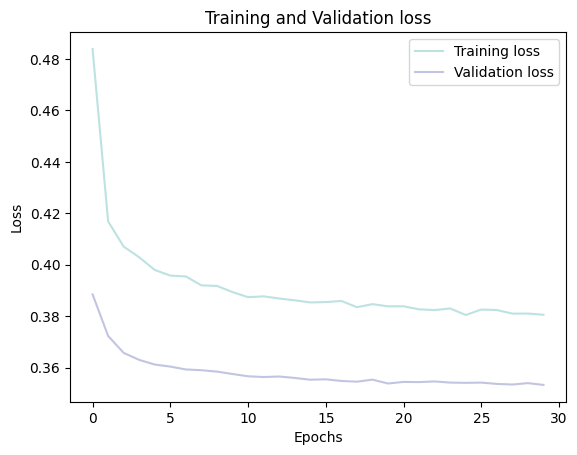

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [ ]:
#Plotting training and validation accuracy over epochs

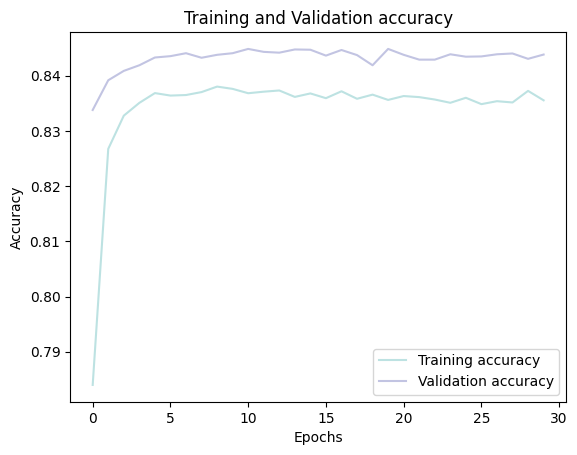

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#CONCLUSION
#CONCLUSIONS¶
#Concluding the model with:

#Testing on the test set
#Evaluating the confusion matrix
#Evaluating the classification report

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred >0.5)

805/805 [==============================] - 1s 1ms/step


<Axes: >

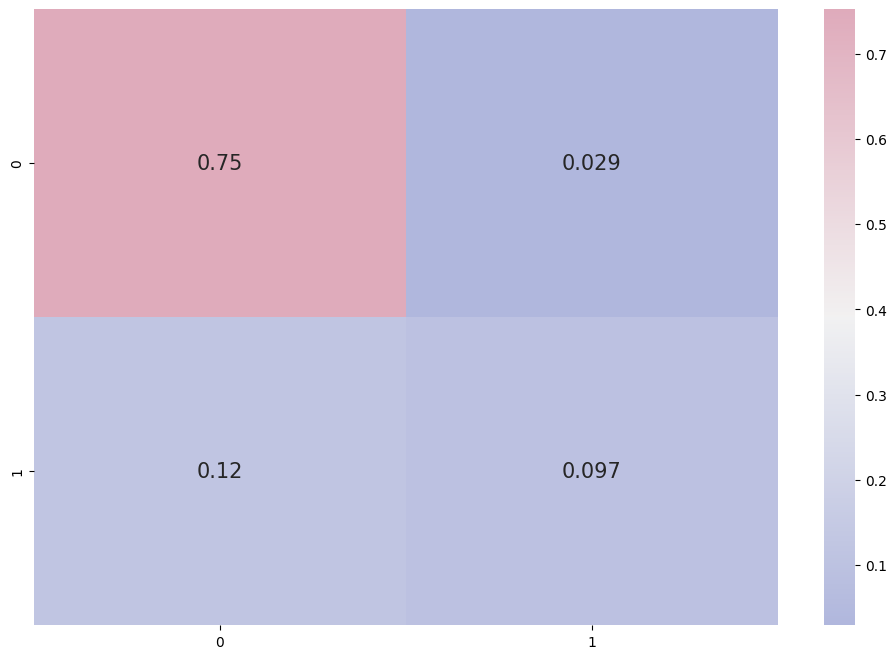

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     20129
           1       0.77      0.44      0.56      5630

    accuracy                           0.85     25759
   macro avg       0.81      0.70      0.73     25759
weighted avg       0.84      0.85      0.83     25759

